In [2]:
import volunteers as ff
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load in Data

In [3]:
# Recent sample first to check ETL process
test_gdf = ff.process_gis('./data/fire_nrt_M6_95549.json')
test_gdf.head()

,latitude,longitude,acq_date,acq_time,daynight,satellite,bright_t31,scan,frp,confidence,instrument,brightness,version,track,month,year,geometry
date,,,,,,,,,,,,,,,,,
2019-10-01 00:25:00+00:00,-14.285,143.521,2019-10-01,0025,D,Terra,304.7,1.7,110.7,94,MODIS,76.25,6.0NRT,1.3,10,2019,POINT (143.52100 -14.28500)
2019-10-01 00:25:00+00:00,-26.202,146.647,2019-10-01,0025,D,Terra,311.7,1.0,72.3,99,MODIS,86.75,6.0NRT,1.0,10,2019,POINT (146.64700 -26.20200)
2019-10-01 00:25:00+00:00,-26.193,146.648,2019-10-01,0025,D,Terra,312.2,1.0,58.8,96,MODIS,81.05,6.0NRT,1.0,10,2019,POINT (146.64800 -26.19300)
2019-10-01 00:25:00+00:00,-26.204,146.657,2019-10-01,0025,D,Terra,311.7,1.0,68.6,99,MODIS,85.35,6.0NRT,1.0,10,2019,POINT (146.65700 -26.20400)
2019-10-01 00:25:00+00:00,-17.083,143.376,2019-10-01,0025,D,Terra,315.0,1.6,76.0,92,MODIS,74.55,6.0NRT,1.2,10,2019,POINT (143.37600 -17.08300)


In [5]:
# Retrieve all archival data and combine with previous recent sample
archive_df = ff.process_gis('./data/fire_archive_M6_95549.json')
gdf = pd.concat([archive_df, test_gdf])
gdf.head()

,acq_date,acq_time,bright_t31,brightness,confidence,daynight,frp,geometry,instrument,latitude,longitude,month,satellite,scan,track,type,version,year
date,,,,,,,,,,,,,,,,,,
2000-11-01 00:17:00+00:00,2000-11-01,0017,305.5,85.45,99,D,161.0,POINT (147.81780 -20.97060),MODIS,-20.9706,147.8178,11,Terra,1.8,1.3,0,6.2,2000
2000-11-01 00:17:00+00:00,2000-11-01,0017,306.6,80.15,96,D,131.2,POINT (147.81190 -20.96530),MODIS,-20.9653,147.8119,11,Terra,1.8,1.3,0,6.2,2000
2000-11-01 00:17:00+00:00,2000-11-01,0017,304.5,79.95,96,D,79.3,POINT (149.63100 -22.93230),MODIS,-22.9323,149.6310,11,Terra,1.3,1.1,0,6.2,2000
2000-11-01 00:17:00+00:00,2000-11-01,0017,310.0,96.55,100,D,368.4,POINT (145.53290 -22.06510),MODIS,-22.0651,145.5329,11,Terra,2.4,1.5,0,6.2,2000
2000-11-01 00:17:00+00:00,2000-11-01,0017,310.4,75.95,93,D,171.4,POINT (145.12130 -22.15480),MODIS,-22.1548,145.1213,11,Terra,2.6,1.5,0,6.2,2000


In [6]:
# Check size of dataset
len(gdf)

1224927

In [7]:
# Check relevant variable for visualization for missing values
# Brightness is Temperature of Fire in Celsius
gdf.brightness.describe()

count    1.224927e+06
mean     8.325377e+01
std      2.723109e+01
min      4.195000e+01
25%      6.845000e+01
50%      8.035000e+01
75%      9.495000e+01
max      2.338500e+02
Name: brightness, dtype: float64

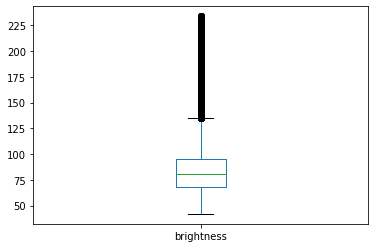

In [9]:
# Check distribution of relevant variable
gdf.brightness.plot(kind='box');

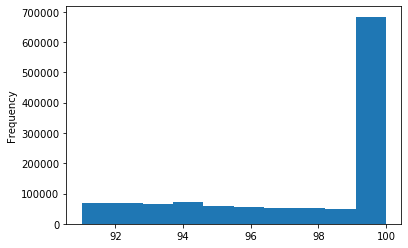

In [10]:
# Determine distribution of confidence for detected fires
# All fires with >90% confidence were removed in ETL process
gdf.confidence.plot(kind='hist');

In [ ]:
# Produce a plot for each month in the range of years
plot_years(2000,2021,gdf)

* Link to gif of results
https://drive.google.com/open?id=1y50KrcrqBehAh38y6vfZFHaWy03tVkqh

# Resources
- data legend
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes
- geopandas 101
http://geopandas.org/gallery/create_geopandas_from_pandas.html
- heatmap onto plotpoint
https://gis.stackexchange.com/questions/333584/plotting-a-heat-map-onto-background-in-python-using-kde
- filtering countries
https://gis.stackexchange.com/questions/282681/filter-a-geopandas-dataframe-for-points-within-a-specific-country
- gif
https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8
https://imagemagick.org/script/command-line-processing.php
- potential backing map
https://nationalmap.gov.au/#share=s-2UkDSPmtyCQNZyO4fNCLGflmhyz
- exogenous variables

    https://2018.hackerspace.govhack.org/data_sets

    http://stat.data.abs.gov.au/

## Gif Creation terminal commands
convert png to jpeg

`for i in *.png; do sips -s format jpeg -s formatOptions 70 "${i}" --out "${i%png}jpg"; done`

collate jpeg into gif based on order of filenames

`magick -delay 10 -loop 0 -quality 50 @order.txt aus_fires.gif`